In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.tree as tree
import sklearn.metrics as metrics
import sklearn.model_selection as ms
import sklearn.compose as compose
import sklearn.preprocessing as pp

import plotly_express as px

In [2]:
import os
os.chdir(r'C:\Users\tanzh\Documents\AI & Machine Learning\my_module')
import ml_metrics

In [3]:
# This datasset will allow us to predict od someone has heart disease based on their age, sex, blood pressure and a variety of other metrics

data = pd.read_csv(r'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header=None)

data.columns = [
                'age', # float
                'sex', # cat
                'cp', # chest pain # cat
                'restbp', # resting blood pressure # float
                'chol', # cholesterol # float
                'fbs', # fasting blood sugar # cat
                'restecg', # resing ecg result #cat
                'thalach', # max heart rate achieved # float
                'exang', # exercise induced angina # cat
                'oldpeak', # ST dpression induced by exercise relative to rest # float
                'slope', # slope of the peak exercise ST segment # cat
                'ca', # number of major vessels 0-3 colored by fluroscopy # float
                'thal', # thailum heart scan # cat
                'hd' # diagnosis of heart disease, the predicted attribute # the target  
                ]

data.head(5)

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [5]:
data['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [6]:
data['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [7]:
data[(data['ca'] == '?') | (data['thal'] == '?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [8]:
data = data[(data['ca'] != '?') & (data['thal'] != '?')] # to select data with no missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      297 non-null    float64
 1   sex      297 non-null    float64
 2   cp       297 non-null    float64
 3   restbp   297 non-null    float64
 4   chol     297 non-null    float64
 5   fbs      297 non-null    float64
 6   restecg  297 non-null    float64
 7   thalach  297 non-null    float64
 8   exang    297 non-null    float64
 9   oldpeak  297 non-null    float64
 10  slope    297 non-null    float64
 11  ca       297 non-null    object 
 12  thal     297 non-null    object 
 13  hd       297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


In [9]:
X = data.copy()
X.drop('hd', inplace=True, axis=1)

y = data['hd'].copy()

In [10]:
X_encoded = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'])      

In [11]:
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [12]:
y.unique() 
# there are different degree of heart disease 
# 0 being no heart disease and 1 and above means having having heart disease

# for the purpose of this exercise, we are interested to know if the individual has heart disease
y[y > 0] = 1  
y.unique()

array([0, 1], dtype=int64)

# A Base Classification Tree Model 

In [13]:
X_train, X_test, y_train, y_test = ms.train_test_split(X_encoded, y, random_state=42)

clf_dt = tree.DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

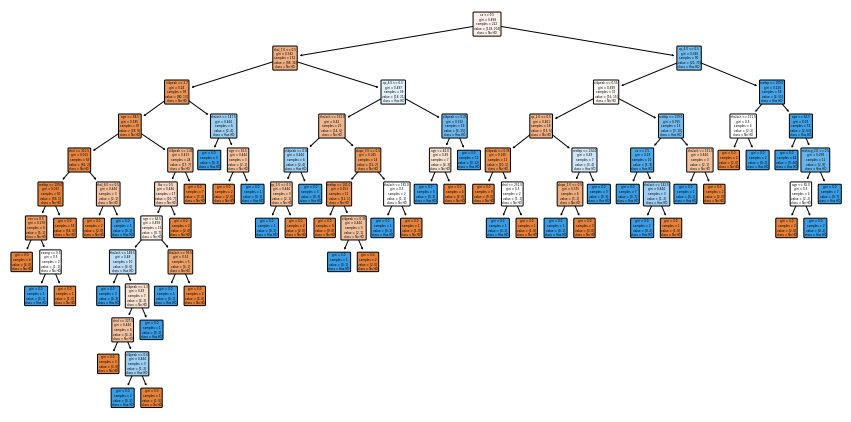

In [14]:
plt.figure(figsize=(15,7.5))
tree.plot_tree(clf_dt, filled=True, rounded=True, class_names=['No HD', 'Has HD'], feature_names=X_encoded.columns)
plt.show()

In [15]:
clf_dt_prediction = clf_dt.predict(X_train)
clf_dt_accuracy = metrics.accuracy_score(y_train, clf_dt_prediction)
clf_dt_accuracy

1.0

-----Performance Summary-----
Accuracy Rate: 100.0%
Precision Rate: 100.0%
Recall Rate: 100.0%
F1 Score: 100.0%

Misc. Info:
Number of data points in X: 222



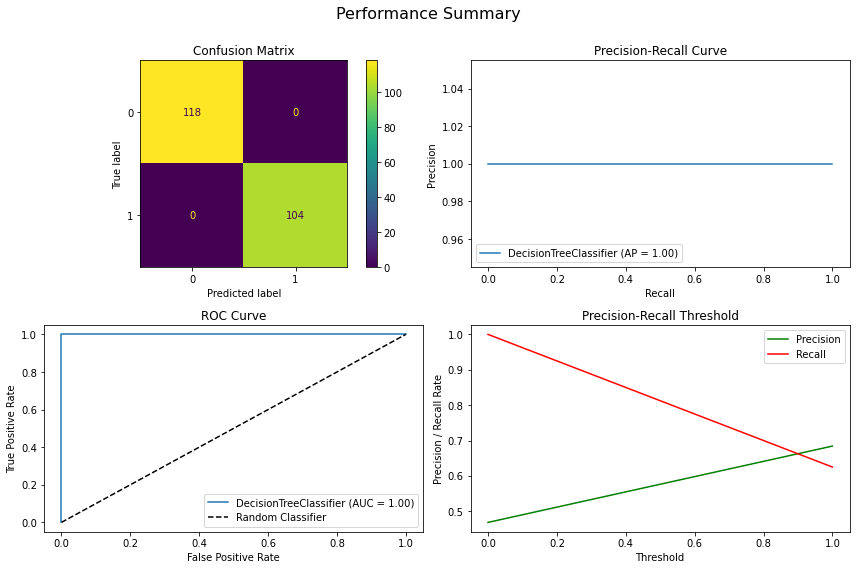

In [16]:
ml_metrics.classifier_performance_report(clf_dt, X_train, y_train)

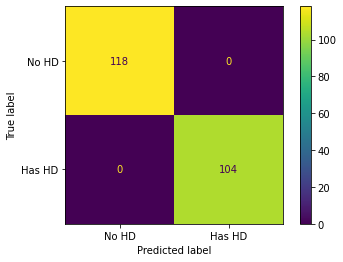

In [17]:
metrics.plot_confusion_matrix(clf_dt, X_train, y_train, display_labels=['No HD', 'Has HD'] ) # 
# it seems that we may have overfitted our model

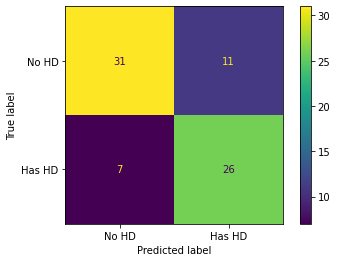

In [18]:
metrics.plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=['No HD', 'Has HD'])
# we are plotting the confusion matrix based on the testing data

-----Performance Summary-----
Accuracy Rate: 76.0%
Precision Rate: 70.3%
Recall Rate: 78.8%
F1 Score: 74.3%

Misc. Info:
Number of data points in X: 75



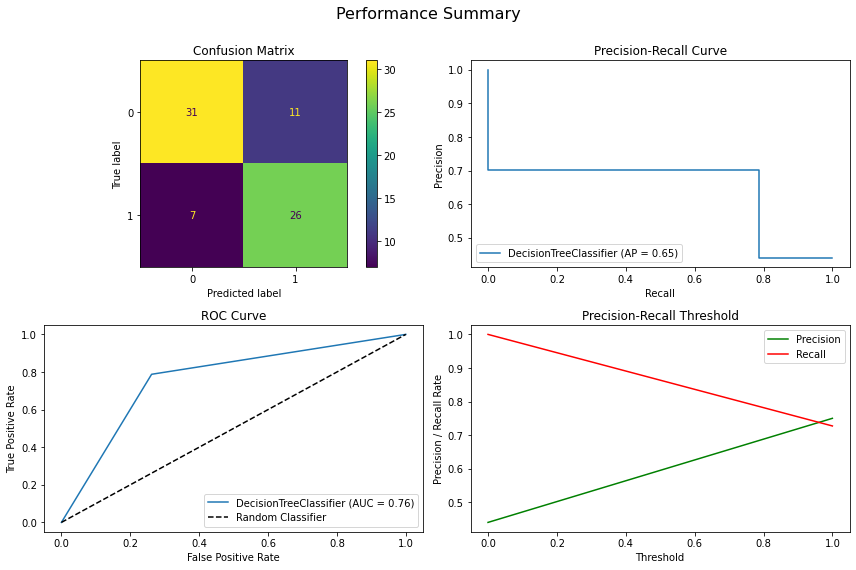

In [19]:
ml_metrics.classifier_performance_report(clf_dt, X_test, y_test)

# Regularization for Decision Tree

- We can regularize a decision tree by pruning the tree which is designed to reduce overfitting
- Pruning a tree with "cost complexity pruning" can simplify the whole process of finding a smaller tree that improve the accuracy with the testing dataset
- Pruning a decision tree is about finding the right value for the pruning parameter (alpha) which control how much pruning happens
- To find the optimal value for alpha, we can plot the accuracy of the tree as a function of different values of alpha
- We will do this with both the training and testing dataset




In [20]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.        , 0.00295295, 0.003861  , 0.00405405, 0.004095  ,
        0.00429358, 0.00514801, 0.00541298, 0.00578761, 0.00600601,
        0.00600601, 0.00600601, 0.00667591, 0.00675676, 0.00757375,
        0.00811505, 0.00868726, 0.00889851, 0.01038181, 0.0105777 ,
        0.01422475, 0.01604051, 0.01642461, 0.02103075, 0.03680006,
        0.03934523, 0.13046216]),
 'impurities': array([0.        , 0.00885886, 0.02430287, 0.03241098, 0.04060099,
        0.04918815, 0.06463216, 0.08628407, 0.10364689, 0.1156589 ,
        0.12767091, 0.13367692, 0.14035282, 0.14710958, 0.15468333,
        0.17091343, 0.17960069, 0.18849919, 0.19888101, 0.2094587 ,
        0.2379082 , 0.25394872, 0.27037333, 0.29140408, 0.32820413,
        0.36754937, 0.49801153])}

In [21]:
ccp_alpha = path.ccp_alphas[:-1] # we will omit the last value as the largest alpha value will prune all the leaves leaving us with only the root node

In [22]:
clf_dt_stored = [] # we use this to store the classifier with different values of alpha

# for each alpha, we
#1 create a classifier
#2 fit the data and then store the classifier in the variable above
for alpha in ccp_alpha: 
    clf_dt = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    clf_dt.fit(X_train, y_train)
    clf_dt_stored.append(clf_dt)

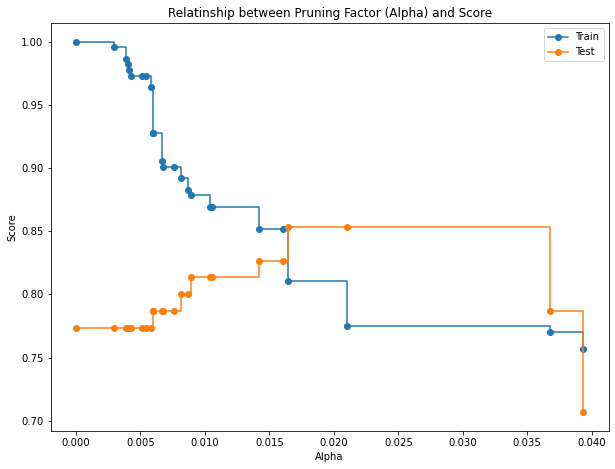

In [23]:
train_score = [clf_dt.score(X_train, y_train) for clf_dt in clf_dt_stored]
test_score = [clf_dt.score(X_test, y_test) for clf_dt in clf_dt_stored]

plt.figure(figsize=(10,7.5))
plt.title('Relatinship between Pruning Factor (Alpha) and Score')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.plot(ccp_alpha, train_score, marker='o', label='Train', drawstyle='steps-post')
plt.plot(ccp_alpha, test_score, marker='o', label='Test', drawstyle='steps-post')
plt.legend()

# Cross-Validation for finding the best alpha

- the above suggest that the 'best' alpha is 0.16, but another set of data might suggest another optimal value
- different training and testing dataset will result in trees with different accuracies even if the ccp_alpha is set to 0.016

This graph shows that with different training and testing dataset, using the same alpha will result in different accuracies
This suggest that alpha is sensitive to the dataset
Hence we should use cross validation to find the optimal value for ccp_alpha


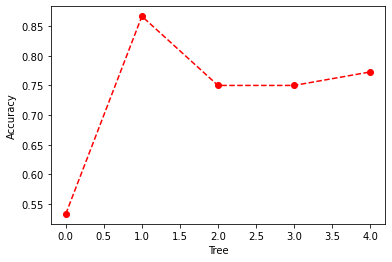

In [24]:
clf_dt = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)

scores = ms.cross_val_score(clf_dt, X_train, y_train, cv=5)
df_scores = pd.DataFrame(data={
                                'tree':range(5), 
                                'accuracy': scores
                                })
plt.ylabel('Accuracy')
plt.xlabel('Tree')
plt.plot(df_scores['tree'], df_scores['accuracy'], marker='o', linestyle='--', color='r')
print('This graph shows that with different training and testing dataset, using the same alpha will result in different accuracies')
print('This suggest that alpha is sensitive to the dataset')
print('Hence we should use cross validation to find the optimal value for ccp_alpha')

In [32]:
alpha_cross_validation = []

for alpha in ccp_alpha:
    clf_dt = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    clf_dt.fit(X_train, y_train)
    clf_dt_score = ms.cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_cross_validation.append([alpha, np.mean(clf_dt_score), np.std(clf_dt_score)])

alpha_table = pd.DataFrame(alpha_cross_validation, columns=['alpha', 'mean_accuracy', 'std_accuracy'])

px.scatter(alpha_table, x='alpha', y='mean_accuracy', color='std_accuracy', title= 'Alpha and Mean Accuracy of Cross-Validation for 26 Alpha Values')

In [26]:
x = alpha_table[(alpha_table['alpha'] > 0.014) & (alpha_table['alpha'] < 0.015)]
x

,alpha,mean_accuracy,std_accuracy
20,0.014225,0.747778,0.091395


In [27]:
ideal_ccp_alpha = float(x['alpha'])
ideal_ccp_alpha

0.014224751066856332

# The Final Model

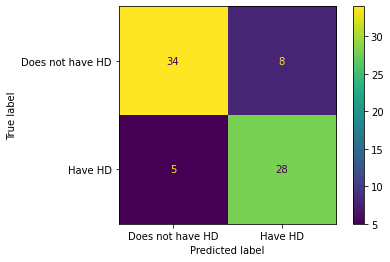

In [28]:
clf_dt_final = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
clf_dt_final.fit(X_train, y_train)

metrics.plot_confusion_matrix(clf_dt_final, X_test, y_test, display_labels=['Does not have HD', 'Have HD'])

-----Performance Summary-----
Accuracy Rate: 82.7%
Precision Rate: 77.8%
Recall Rate: 84.8%
F1 Score: 81.2%

Misc. Info:
Number of data points in X: 75



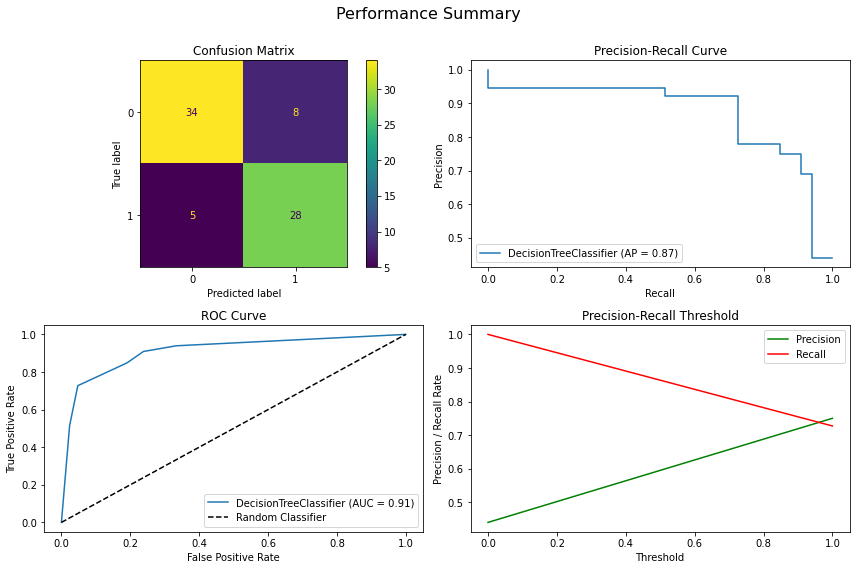

In [29]:
ml_metrics.classifier_performance_report(clf_dt_final, X_test, y_test)

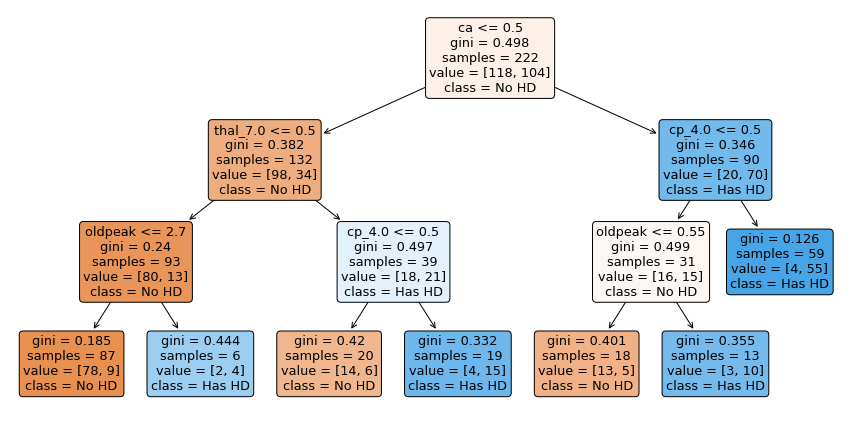

In [30]:
plt.figure(figsize=(15,7.5))
tree.plot_tree(clf_dt_final, filled=True, rounded=True, class_names=['No HD', 'Has HD'], feature_names=X_encoded.columns)
plt.show()

# Darker colors means lower gini impurity value which means better the split